In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
tickers = ['PG', 'MSFT', 'F', 'GE']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [9]:
data.iloc[0]

PG      8.313478
MSFT    2.406834
F       3.262354
GE      4.074910
Name: 1995-01-03 00:00:00, dtype: float64

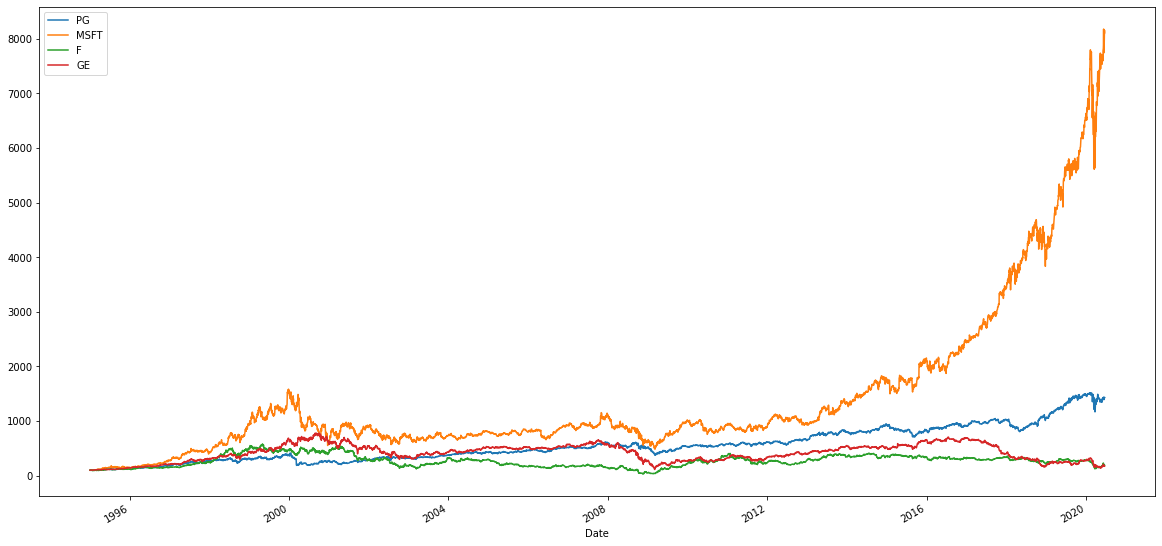

In [10]:
# normalize data to 100 and plot it
(data / data.iloc[0] * 100).plot(figsize=(20,10))

In [12]:
# Calculate the simple rate of the portfolio
simple_returns = ((data/data.shift(1)) - 1).dropna()
simple_returns

,PG,MSFT,F,GE
Date,,,,
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009827
1995-01-10,0.012321,0.012448,-0.017316,0.007444
...,...,...,...,...
2020-06-15,0.009254,0.006392,0.006192,-0.001379
2020-06-16,0.012340,0.024505,0.007692,0.031768
2020-06-17,-0.001693,0.003461,-0.033588,-0.030790


In [16]:
weights = np.array([0.4, 0.3, 0.1, 0.2])
portfolio_return = np.dot(simple_returns, weights)
portfolio_return

array([ 0.00166516, -0.01098817,  0.0048731 , ..., -0.00915558,
        0.00889649, -0.00814637])

In [19]:
# Calculate the annualized average portfolio return
avg_annual_return = round(portfolio_return.mean() * 252, 3)
print(f"avg_annual_return = {avg_annual_return * 100: .3f} %")

avg_annual_return =  14.400 %
